# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [58]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [14]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [23]:
# What the dataset looks like?
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [25]:
# What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [31]:
# Which columns contain the features of the websites?
features = websites.columns[:-1] 

# Which column contains the feature we will predict? 
target = websites.columns[-1]  

print("\nFeature Columns:")
print(features)

print("\nTarget Column:")
print(target)


Feature Columns:
Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES'],
      dtype='object')

Target Column:
Type


In [35]:
# What is the code standing for benign vs malicious websites?
# Analyze the target column
print("\nUnique Values in the Target Column:")
print(websites[target].unique())

print("\nValue Counts in the Target Column:")
print(websites[target].value_counts())


Unique Values in the Target Column:
[1 0]

Value Counts in the Target Column:
Type
0    1565
1     216
Name: count, dtype: int64


In [39]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# Check categorical columns
categorical_cols = websites.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],
      dtype='object')


In [43]:
# Identify which categorical columns need transformation
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(websites[col].unique())


Unique values in 'URL':
['M0_109' 'B0_2314' 'B0_911' ... 'B0_162' 'B0_1152' 'B0_676']

Unique values in 'CHARSET':
['iso-8859-1' 'UTF-8' 'us-ascii' 'ISO-8859-1' 'utf-8' nan 'windows-1251'
 'ISO-8859' 'windows-1252']

Unique values in 'SERVER':
['nginx' 'Apache/2.4.10' 'Microsoft-HTTPAPI/2.0' nan 'Apache/2'
 'nginx/1.10.1' 'Apache' 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'openresty/1.11.2.1' 'Apache/2.2.22' 'Apache/2.4.7 (Ubuntu)'
 'nginx/1.12.0'
 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Oracle-iPlanet-Web-Server/7.0' 'cloudflare-nginx' 'nginx/1.6.2'
 'openresty' 'Heptu web server' 'Pepyaka/1.11.3' 'nginx/1.8.0'
 'nginx/1.10.1 + Phusion Passenger 5.0.30' 'Apache/2.2.29 (Amazon)'
 'Microsoft-IIS/7.5' 'LiteSpeed'
 'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4' 'tsa_c'
 'Apache/2.2.0 (Fedora)' 'Apache/2.2.22 (Debian)' 'Apache/2.2.15 (CentOS)'
 'Apache/2.4.25' 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 '

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [50]:
# Select numeric columns for correlation analysis
numeric_col = websites.select_dtypes(include=["number"])

In [52]:
# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_col.corr()

In [54]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                           URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE   -0.038407                  -0.037459   
DIST_REMOTE_TCP_PORT        -0.039839                  -0.042619   
REMOTE_IPS                  -0.046367                  -0.047103   
APP_BYTES                   -0.026446                  -0.023914   
SOURCE_APP_PACKETS          -0.042264                  -0.040096   
REMOTE_APP_PACKETS          -0.033779                  -0.030597   
SOURCE_APP_BYTES            -0.014857                  -0.014376   
REMOTE_APP_BYTES            -0.026686                  -0.024098   
APP_PACKETS                 -0.042264                  -0.040096   
DNS_QUERY_TIMES             -0.068582                  -0.050048   
Type                        

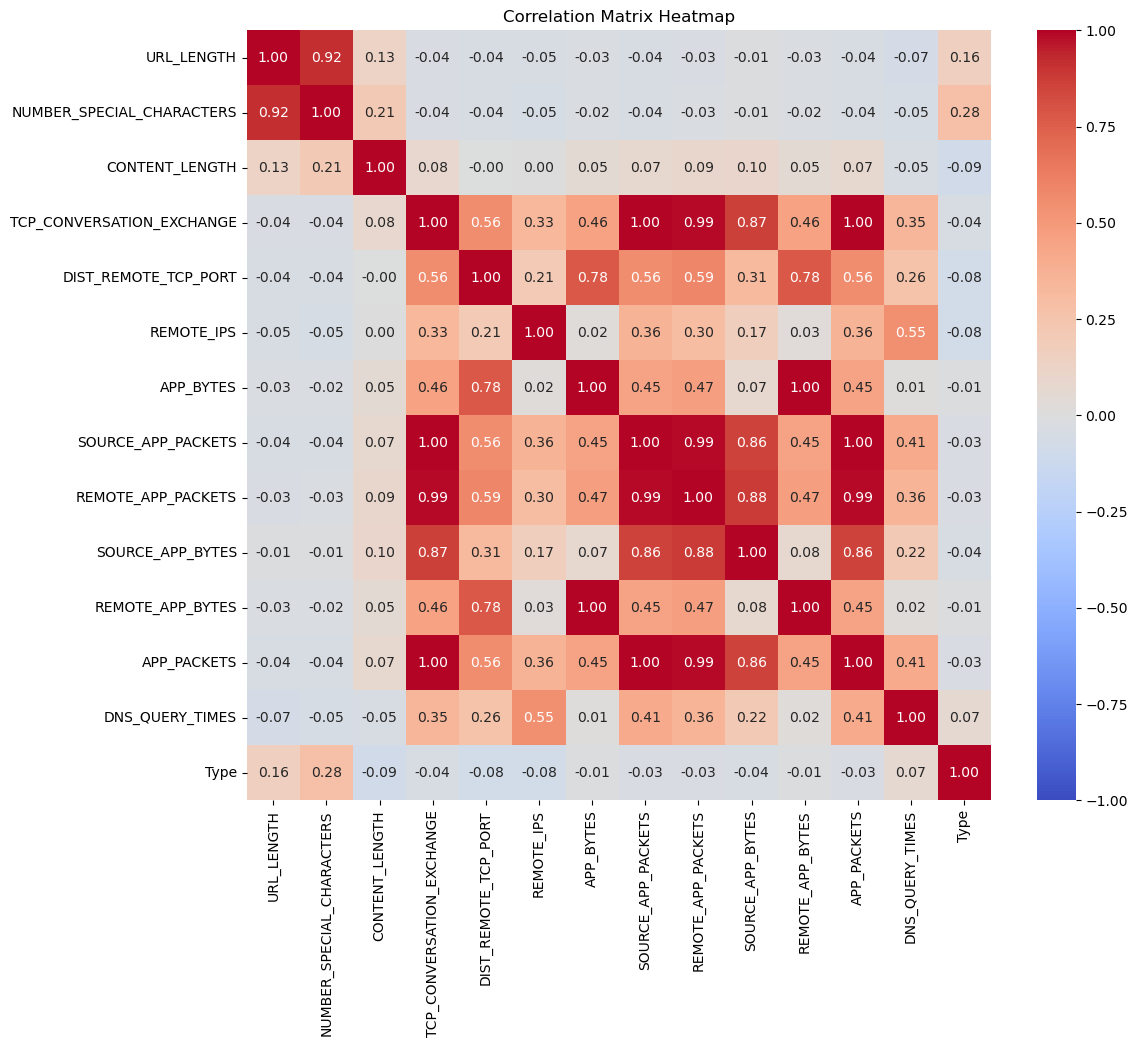

In [60]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

Comment on which columns you might need to remove due to high collinearity.

Highly correlated columns:
TCP_CONVERSATION_EXCHANGE - REMOTE_APP_PACKETS
TCP_CONVERSATION_EXCHANGE - SOURCE_APP_BYTES
TCP_CONVERSATION_EXCHANGE - SOURCE_APP_PACKETS
TCP_CONVERSATION_EXCHANGE - APP_PACKETS
SOURCE_APP_PACKETS - REMOTE_APP_PACKETS
SOURCE_APP_PACKETS - SOURCE_APP_BYTES
SOURCE_APP_PACKETS - APP_PACKETS
REMOTE_APP_PACKETS - SOURCE_APP_BYTES
REMOTE_APP_PACKETS - APP_PACKETS
SOURCE_APP_BYTES - APP_PACKETS

Columns to drop:
- REMOTE_APP_PACKETS: Highly correlated with TCP_CONVERSATION_EXCHANGE
- APP_PACKETS: Redundant with SOURCE_APP_PACKETS and SOURCE_APP_BYTES
- SOURCE_APP_BYTES: Redundant with TCP_CONVERSATION_EXCHANGE

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

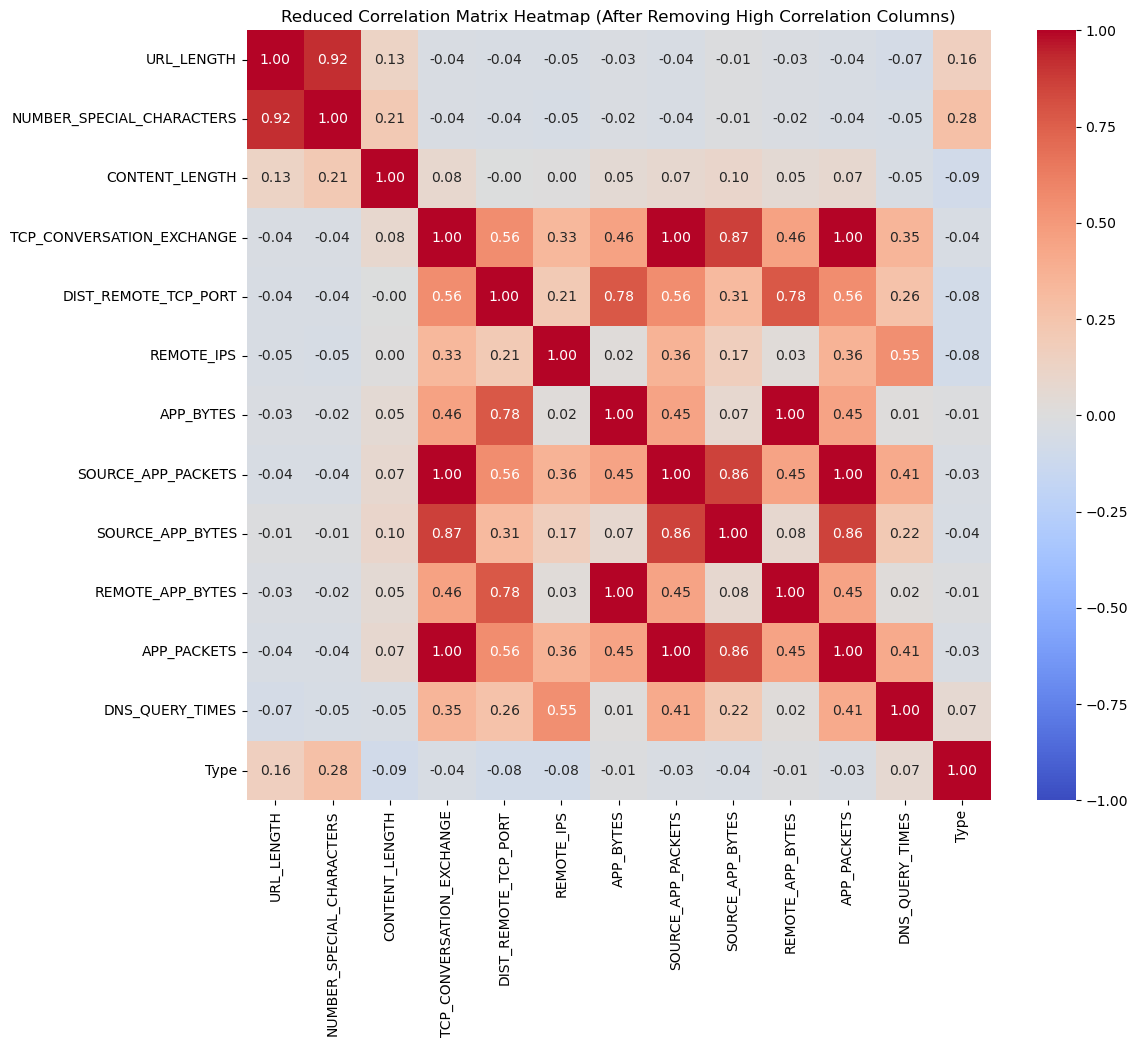

In [64]:
# Your code here
# Columns to drop based on initial heatmap
columns_to_drop = ['REMOTE_APP_PACKETS']
reduced = numeric_col.drop(columns=columns_to_drop)

# Recalculate the correlation matrix after column removal
correlation_matrix_reduced = reduced.corr()

# Heatmap after removing highly correlated columns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_reduced, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Reduced Correlation Matrix Heatmap (After Removing High Correlation Columns)")
plt.show()

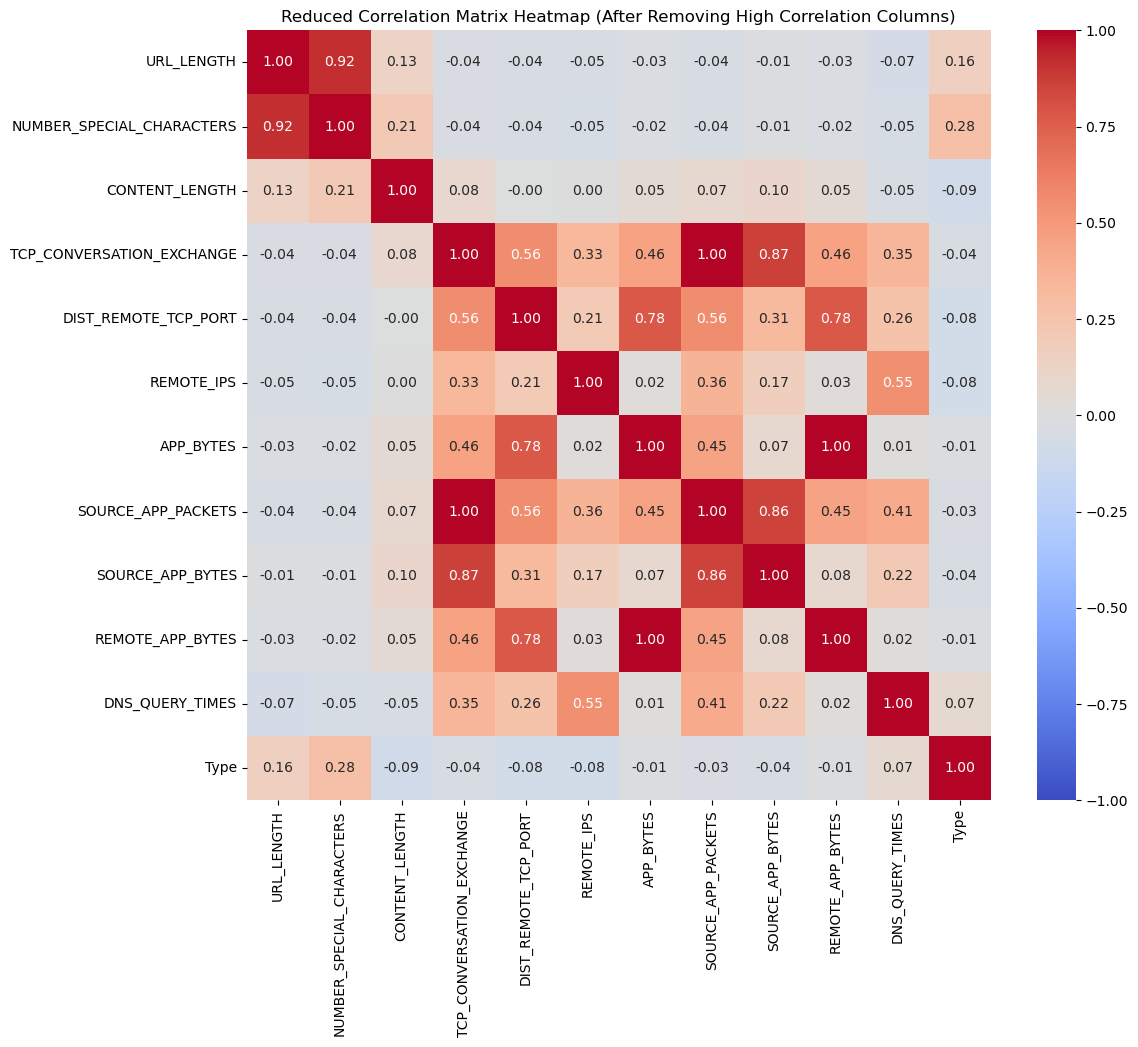

In [70]:
# Columns to drop based on heatmap
columns_to_drop = ['REMOTE_APP_PACKETS','APP_PACKETS']
reduced = numeric_col.drop(columns=columns_to_drop)

# Recalculate the correlation matrix after column removal
correlation_matrix_reduced = reduced.corr()

# Heatmap after removing highly correlated columns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_reduced, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Reduced Correlation Matrix Heatmap (After Removing High Correlation Columns)")
plt.show()

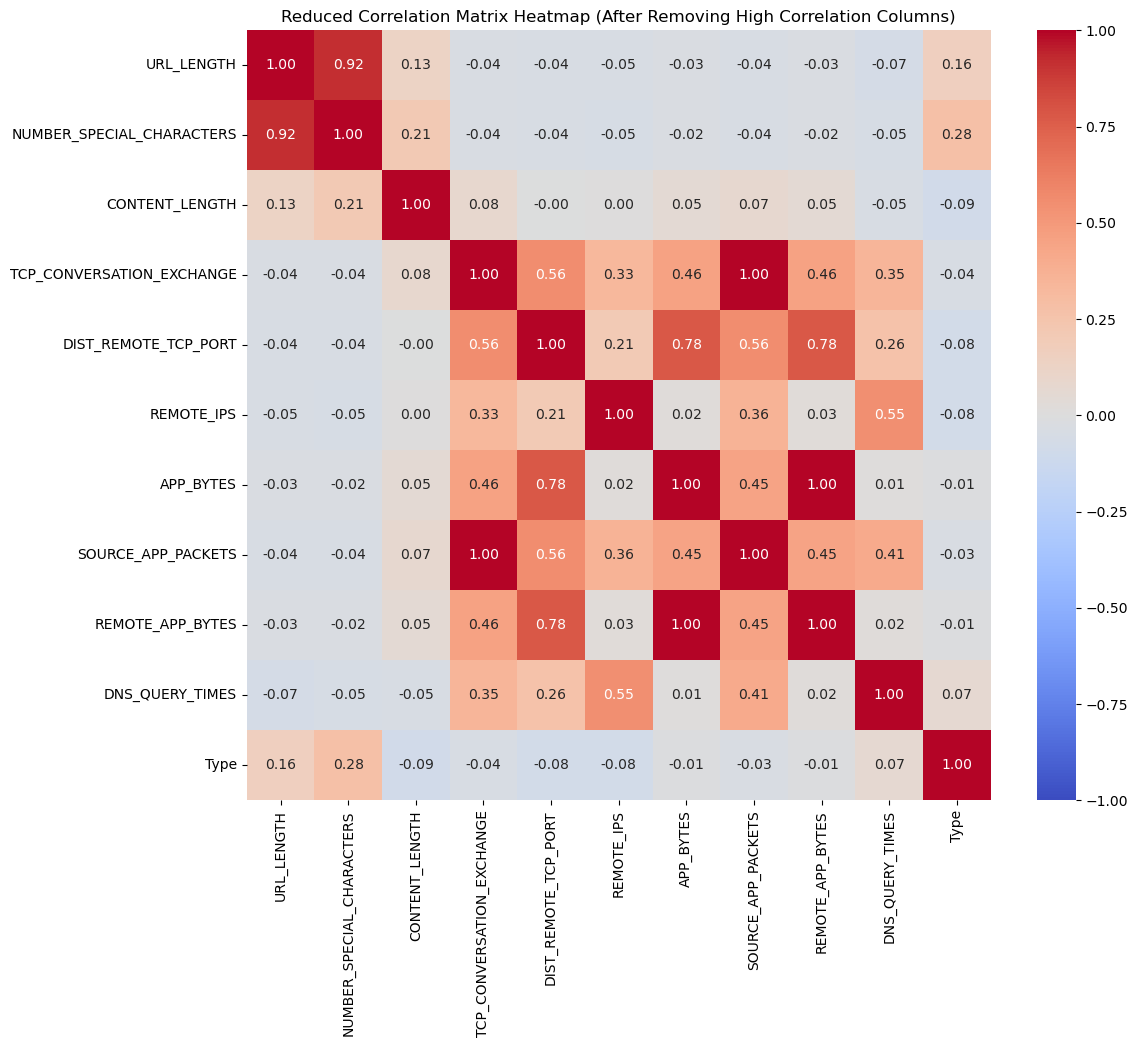

In [72]:
# Columns to drop based on heatmap
columns_to_drop = ['REMOTE_APP_PACKETS','APP_PACKETS','SOURCE_APP_BYTES']
reduced = numeric_col.drop(columns=columns_to_drop)

# Recalculate the correlation matrix after column removal
correlation_matrix_reduced = reduced.corr()

# Heatmap after removing highly correlated columns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_reduced, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Reduced Correlation Matrix Heatmap (After Removing High Correlation Columns)")
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [76]:
# Your code here
missing_values = websites.isnull().sum()
print(missing_values)

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [82]:
# Calculate the percentage of missing values in each column
missing_percentage = (websites.isnull().sum() / len(websites)) * 100
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
URL                           0.000000
URL_LENGTH                    0.000000
NUMBER_SPECIAL_CHARACTERS     0.000000
CHARSET                       0.393038
SERVER                        9.882089
CONTENT_LENGTH               45.592364
WHOIS_COUNTRY                17.181359
WHOIS_STATEPRO               20.325660
WHOIS_REGDATE                 7.130825
WHOIS_UPDATED_DATE            7.804604
TCP_CONVERSATION_EXCHANGE     0.000000
DIST_REMOTE_TCP_PORT          0.000000
REMOTE_IPS                    0.000000
APP_BYTES                     0.000000
SOURCE_APP_PACKETS            0.000000
REMOTE_APP_PACKETS            0.000000
SOURCE_APP_BYTES              0.000000
REMOTE_APP_BYTES              0.000000
APP_PACKETS                   0.000000
DNS_QUERY_TIMES               0.056148
Type                          0.000000
dtype: float64


In [84]:
# Drop columns with a high proportion of missing values 
threshold = 50  # Threshold for missing percentage
columns_to_drop = missing_percentage[missing_percentage > threshold].index
print("\nColumns to Drop (More than 50% Missing):", columns_to_drop.tolist())
dropped_columns = websites.drop(columns=columns_to_drop)

# Drop rows with any remaining missing values
cleaned = dropped_columns.dropna()

# Verify that all missing values are handled
print("\nRemaining Missing Values in Each Column After Handling:")
print(cleaned.isnull().sum())

# Display the resulting dataset shape
print("\nShape of the Dataset After Handling Missing Values:")
print(cleaned.shape)


Columns to Drop (More than 50% Missing): []

Remaining Missing Values in Each Column After Handling:
URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

Shape of the Dataset After Handling Missing Values:
(636, 21)


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [13]:
# Examine missing values in each column


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [88]:
# List out the unique values in WHOIS_COUNTRY
unique_countries = websites['WHOIS_COUNTRY'].unique()
print("Unique Values in WHOIS_COUNTRY Before Consolidation:")
print(unique_countries)

Unique Values in WHOIS_COUNTRY Before Consolidation:
[nan 'US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'se' 'IN' 'LU' 'TH'
 "[u'GB'; u'UK']" 'FR' 'NL' 'UG' 'JP' 'CN' 'SE' 'SI' 'IL' 'ru' 'KY' 'AT'
 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE' 'ES' 'BR' 'us' 'KR' 'HK' 'UA' 'CH'
 'United Kingdom' 'BS' 'PK' 'IT' 'Cyprus' 'BY' 'AE' 'IE' 'UY' 'KG']


In [92]:
# Create a mapping dictionary for consolidating country codes
country_mapping = {
    'CY': 'CY',
    'Cyprus': 'CY',
    'US': 'US',
    'us': 'US',
    'SE': 'SE',
    'se': 'SE',
    'GB': 'GB',
    'United Kingdom': 'GB',
    "[u'GB'; u'UK']": 'GB'
}

# Mapping to WHOIS_COUNTRY
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(country_mapping)

# Step 4: Verify the changes
print("\nUnique Values in WHOIS_COUNTRY After Consolidation:")
print(websites['WHOIS_COUNTRY'].unique())


Unique Values in WHOIS_COUNTRY After Consolidation:
[nan 'US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'SE' 'IN' 'LU' 'TH' 'FR' 'NL'
 'UG' 'JP' 'CN' 'SI' 'IL' 'ru' 'KY' 'AT' 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV'
 'DE' 'ES' 'BR' 'KR' 'HK' 'UA' 'CH' 'BS' 'PK' 'IT' 'CY' 'BY' 'AE' 'IE'
 'UY' 'KG']


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

Value Counts for WHOIS_COUNTRY:
WHOIS_COUNTRY
US    1106
CA      84
ES      63
AU      35
GB      25
PA      21
JP      11
UK      10
CN      10
IN      10
FR       9
CZ       9
CH       6
NL       6
KR       5
PH       4
ru       4
AT       4
BS       4
SE       4
KY       3
SC       3
BE       3
TR       3
HK       3
DE       3
BR       2
CY       2
UA       2
UY       2
KG       2
RU       2
NO       2
IL       2
SI       2
LV       1
PK       1
IT       1
LU       1
BY       1
AE       1
IE       1
UG       1
TH       1
Name: count, dtype: int64


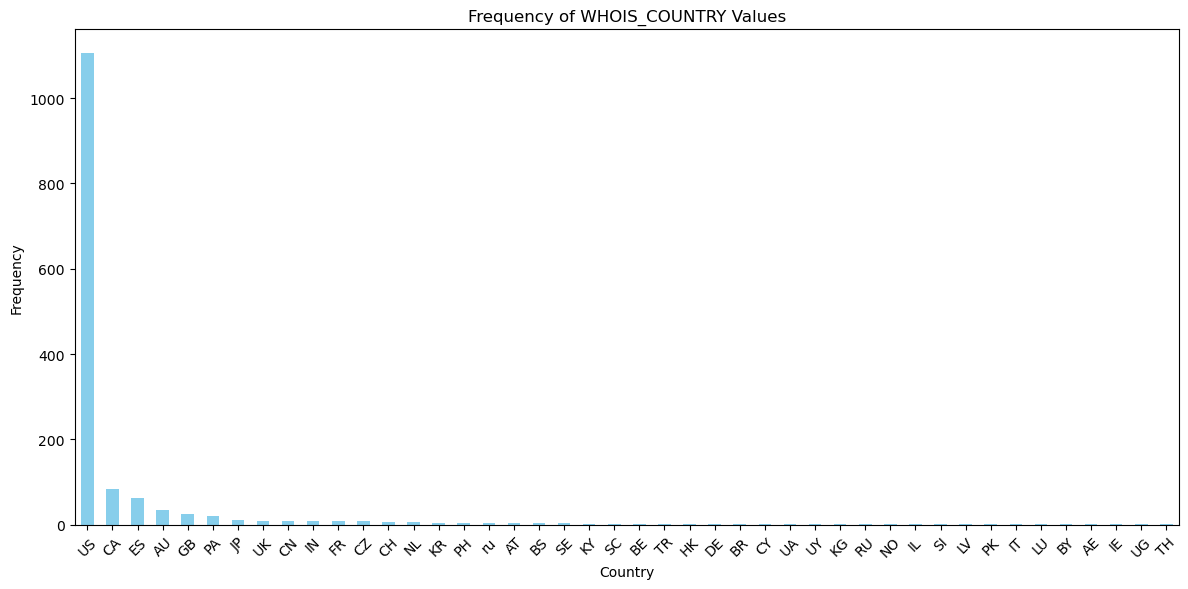

In [96]:
# Occurrences of each country in the WHOIS_COUNTRY column
country_counts = websites['WHOIS_COUNTRY'].value_counts()

print("Value Counts for WHOIS_COUNTRY:")
print(country_counts)

# Visualize the distribution using a bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of WHOIS_COUNTRY Values")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

Top 10 Countries: ['US', 'OTHER', 'CA', 'ES', 'AU', 'GB', 'PA', 'JP', 'UK', 'IN']

Value Counts After Re-labeling:
WHOIS_COUNTRY
US       1106
OTHER     416
CA         84
ES         63
AU         35
GB         25
PA         21
JP         11
UK         10
IN         10
Name: count, dtype: int64


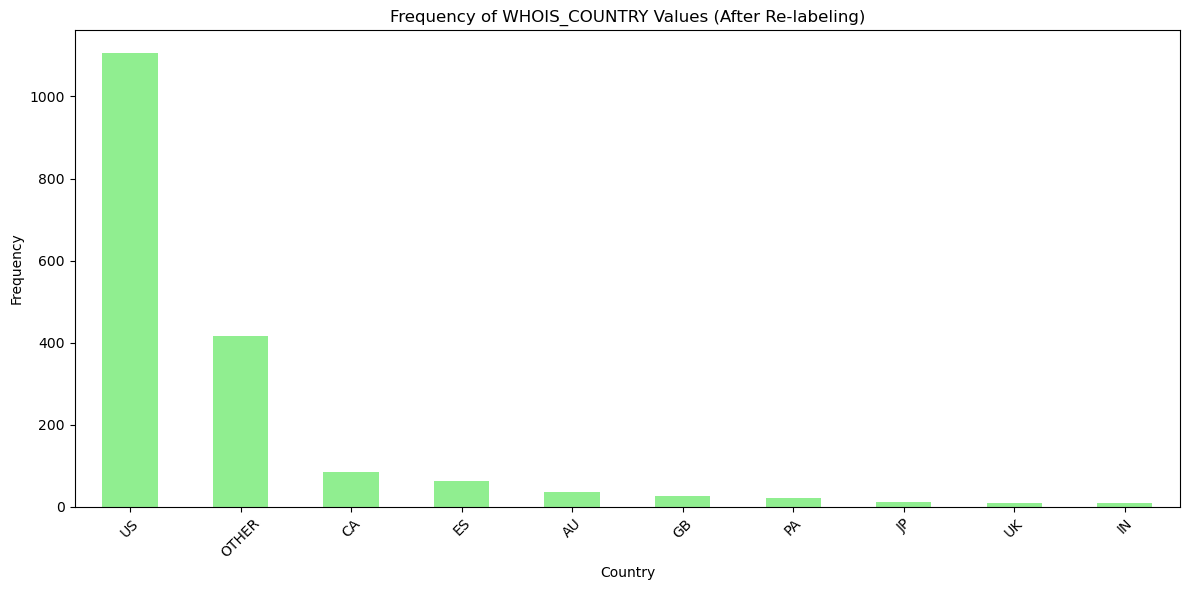

In [102]:
# Your code here
# Identify the top 10 most frequent countries
top_10_countries = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index
print("Top 10 Countries:", top_10_countries.tolist())

# Re-label all other countries as "OTHER"
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

print("\nValue Counts After Re-labeling:")
print(websites['WHOIS_COUNTRY'].value_counts())

# Visualize the updated distribution
plt.figure(figsize=(12, 6))
websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Frequency of WHOIS_COUNTRY Values (After Re-labeling)")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [112]:
# Your code here
# Drop the specified columns
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites = websites.drop(columns=columns_to_drop)

websites.columns

KeyError: "['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'] not found in axis"

In [114]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,OTHER,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,OTHER,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,OTHER,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,57,2,5,4278,61,62,129889,4586,61,4.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [118]:
# Your code here
# Print the data types of each column
print("Data Types of Each Column:")
print(websites.dtypes)

Data Types of Each Column:
URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


In [120]:
# Identify remaining categorical columns
categorical_columns = websites.select_dtypes(include=['object']).columns
print("\nRemaining Categorical Columns:")
print(categorical_columns.tolist())


Remaining Categorical Columns:
['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY']


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [122]:
# Your code here
# Drop the 'URL' column
websites = websites.drop(columns=['URL'])

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [124]:
# Your code here
# Print the unique value counts of the 'CHARSET' column
charset_counts = websites['CHARSET'].value_counts()

print("Unique Value Counts of CHARSET:")
print(charset_counts)

Unique Value Counts of CHARSET:
CHARSET
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [128]:
# Your code here
# Print the unique values of the 'SERVER' column
unique_servers = websites['SERVER'].unique()

print("Unique Values in SERVER Column:")
print(unique_servers)

Unique Values in SERVER Column:
['nginx' 'Apache/2.4.10' 'Microsoft-HTTPAPI/2.0' nan 'Apache/2'
 'nginx/1.10.1' 'Apache' 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'openresty/1.11.2.1' 'Apache/2.2.22' 'Apache/2.4.7 (Ubuntu)'
 'nginx/1.12.0'
 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Oracle-iPlanet-Web-Server/7.0' 'cloudflare-nginx' 'nginx/1.6.2'
 'openresty' 'Heptu web server' 'Pepyaka/1.11.3' 'nginx/1.8.0'
 'nginx/1.10.1 + Phusion Passenger 5.0.30' 'Apache/2.2.29 (Amazon)'
 'Microsoft-IIS/7.5' 'LiteSpeed'
 'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4' 'tsa_c'
 'Apache/2.2.0 (Fedora)' 'Apache/2.2.22 (Debian)' 'Apache/2.2.15 (CentOS)'
 'Apache/2.4.25' 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips' 'Apache/2.2.22 (Ubuntu)'
 'Tengine'
 'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.

In [130]:
# Count the frequency of each unique value
server_counts = websites['SERVER'].value_counts()

print("\nFrequency of Unique SERVER Values:")
print(server_counts)


Frequency of Unique SERVER Values:
SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64


![Think Hard](../images/think-hard.jpg)

# Your comment here
- Keep the most frequent server types (e.g., Apache, nginx, Microsoft-HTTPAPI/2.0) as they account for a significant portion of the data.
- Combine all other server types into a single category labeled OTHER.
- Use a frequency threshold to decide which values to keep.

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [135]:
# Your code here
# Define a function to re-label the SERVER values
def categorize_server(value):
    if isinstance(value, str):  
        if 'Microsoft' in value:
            return 'Microsoft'
        elif 'Apache' in value:
            return 'Apache'
        elif 'nginx' in value:
            return 'nginx'
        else:
            return 'Other'
    else:
        return 'Other' 

# Apply the function to the SERVER column
websites['SERVER'] = websites['SERVER'].apply(categorize_server)

# Verify the changes
print("Updated Unique Values in SERVER Column:")
print(websites['SERVER'].unique())

Updated Unique Values in SERVER Column:
['nginx' 'Apache' 'Microsoft' 'Other']


In [137]:
# Count `SERVER` value counts here
print("\nUpdated Frequency of SERVER Values:")
print(websites['SERVER'].value_counts())


Updated Frequency of SERVER Values:
SERVER
Apache       643
Other        505
nginx        435
Microsoft    198
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [145]:
# Your code here
# Convert categorical data to dummy variables
website_dummy = pd.get_dummies(websites, drop_first=True)

print("Columns After Converting Categorical Data to Dummy Variables:")
print(website_dummy.columns)

Columns After Converting Categorical Data to Dummy Variables:
Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'CHARSET_ISO-8859-1', 'CHARSET_UTF-8',
       'CHARSET_iso-8859-1', 'CHARSET_us-ascii', 'CHARSET_utf-8',
       'CHARSET_windows-1251', 'CHARSET_windows-1252', 'SERVER_Microsoft',
       'SERVER_Other', 'SERVER_nginx', 'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_ES',
       'WHOIS_COUNTRY_GB', 'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP',
       'WHOIS_COUNTRY_OTHER', 'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK',
       'WHOIS_COUNTRY_US'],
      dtype='object')


In [147]:
website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,16,7,263.0,7,0,2,700,9,10,1153,...,True,False,False,False,False,False,True,False,False,False
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,False,False,False,False,False,False,True,False,False,False
2,16,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,17,6,162.0,31,22,3,3812,39,37,18784,...,True,False,False,False,False,False,False,False,False,True
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [149]:
# Your code here
website_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859-1              bool
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
CHARSET_windows-1252            bool
SERVER_Microsoft                bool
SERVER_Other                    bool
SERVER_nginx                    bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_ES                bool
WHOIS_COUNTRY_GB                bool
W

In [153]:
categorical_columns = website_dummy.select_dtypes(include=['object']).columns
categorical_columns.tolist()

[]

In [155]:
website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,16,7,263.0,7,0,2,700,9,10,1153,...,True,False,False,False,False,False,True,False,False,False
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,False,False,False,False,False,False,True,False,False,False
2,16,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,17,6,162.0,31,22,3,3812,39,37,18784,...,True,False,False,False,False,False,False,False,False,True
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,False,False,False,False,False,False,False,False,False,True


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [157]:
from sklearn.model_selection import train_test_split

# Your code here:
# Separate features (X) and target variable (y)
X = website_dummy.drop(columns=['Type']) 
y = website_dummy['Type']  

In [159]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Verify the split
print("Training Set Shape (X_train):", X_train.shape)
print("Testing Set Shape (X_test):", X_test.shape)
print("Training Target Shape (y_train):", y_train.shape)
print("Testing Target Shape (y_test):", y_test.shape)

Training Set Shape (X_train): (1424, 32)
Testing Set Shape (X_test): (357, 32)
Training Target Shape (y_train): (1424,)
Testing Target Shape (y_test): (357,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [163]:
# Your code here:

# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [165]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [167]:
# Print the model to verify initialization
print("Initialized Logistic Regression Model:")
print(logistic_model)

Initialized Logistic Regression Model:
LogisticRegression(max_iter=1000, random_state=42)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [173]:
# Missing values in the training data
print("Missing Values in X_train:")
print(X_train.isnull().sum().sum())

# Handle missing values by imputing with the mean for simplicity
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)  
X_test = imputer.transform(X_test)        


Missing Values in X_train:
639


In [175]:
# Your code here:
# Fit the Logistic Regression model to the training data
logistic_model.fit(X_train, y_train)

# Print confirmation that the model has been trained
print("Logistic Regression model has been trained.")

Logistic Regression model has been trained.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [179]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict on the testing data
y_pred = logistic_model.predict(X_test)

In [181]:
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[299   7]
 [ 20  31]]


In [183]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(accuracy)


Accuracy Score:
0.9243697478991597


What are your thoughts on the performance of the model? Write your conclusions below.

# Your conclusions here:

- High accuracy score indicating that the logistic regression model is generally effective for this dataset.
- If Type = 1 cases are more critical, you might want to optimize recall to minimize false negatives.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [188]:
# Your code here:

from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Print confirmation
print("K-Nearest Neighbors model has been trained.")

K-Nearest Neighbors model has been trained.


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [192]:
# Your code here:

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (K-Nearest Neighbors):")
print(conf_matrix_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy Score (K-Nearest Neighbors):")
print(accuracy_knn)


Confusion Matrix (K-Nearest Neighbors):
[[297   9]
 [ 20  31]]

Accuracy Score (K-Nearest Neighbors):
0.9187675070028011


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [194]:
# Your code here:

# Initialize the K-Nearest Neighbors model with k=5
knn_model_k5 = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn_model_k5.fit(X_train, y_train)

# Predict on the testing data using the KNN model with k=5
y_pred_knn_k5 = knn_model_k5.predict(X_test)

# Compute the confusion matrix
conf_matrix_knn_k5 = confusion_matrix(y_test, y_pred_knn_k5)
print("Confusion Matrix (K-Nearest Neighbors, k=5):")
print(conf_matrix_knn_k5)

# Compute the accuracy score
accuracy_knn_k5 = accuracy_score(y_test, y_pred_knn_k5)
print("\nAccuracy Score (K-Nearest Neighbors, k=5):")
print(accuracy_knn_k5)

Confusion Matrix (K-Nearest Neighbors, k=5):
[[299   7]
 [ 20  31]]

Accuracy Score (K-Nearest Neighbors, k=5):
0.9243697478991597


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

# Your conclusions here:

Confusion Matrix:
- True Negatives increased from 297 to 299 when 𝑘=5 k=5, indicating fewer benign websites (Type = 0) were misclassified as malicious (Type = 1).
- The number of False Positives (FP) decreased from 9 to 7 when 𝑘=5 k=5.
- False Negatives (FN) and True Positives (TP) remained the same.

Accuracy:
- The accuracy score improved slightly from 91.88% to 92.44% with 𝑘=5 reflecting fewer overall misclassifications.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [38]:
# Your code here